In [1]:
pip install mahotas

In [2]:
import numpy as np
import pandas as pd
import os
import string
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import mahotas 
import cv2
import os
import sys

In [3]:
dataset = pd.read_csv("apple_features.csv")

In [4]:
dataset.head(5)

,Unnamed: 0,isHealthy,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,Apple___Black_rot,111.653564,118.266891,103.696976,53.175653,37.329550,51.742591,642.442633,0.828300,0.060938,13.358900
1,0,Apple___Black_rot,121.940063,122.818069,127.231995,50.305909,47.988402,52.886407,546.947095,0.884752,0.149001,12.906667
2,0,Apple___Black_rot,112.254074,123.337952,108.476837,60.731182,45.710183,72.154916,921.051755,0.827812,0.071665,13.840327
3,0,Apple___Black_rot,117.993652,120.947250,120.620193,54.241066,42.104179,62.929841,741.525799,0.834933,0.115369,13.116848
4,0,Apple___Black_rot,114.553238,125.674103,102.157394,50.405860,41.137000,58.815783,603.232223,0.829814,0.104557,13.271357


In [5]:
#Shuffling the dataset 
dataset = shuffle(dataset)

In [6]:
#import seaborn as sns
#sns.pairplot(dataset,hue='isHealthy',palette='Dark2')

In [7]:
#Healthy
health_list = []
for d in dataset['isHealthy']:
  if "Apple___healthy" in d:
    health_list.append(0)
  else:
    health_list.append(1)

In [8]:
#np.set_printoptions(threshold=sys.maxsize)
y = np.array(health_list)
print(y)

[1 0 1 ... 1 1 1]


In [9]:
X = dataset.iloc[:,2:]

In [10]:
X.head(5)

,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
3047,122.862152,133.027466,118.053818,46.450590,33.805120,59.282890,566.430417,0.812212,0.068072,13.492780
1456,100.776596,95.769135,87.664169,55.172311,46.821402,51.962276,799.143919,0.837365,0.072919,13.828493
2876,86.714188,109.878799,96.051422,27.710942,19.670956,37.433236,309.147607,0.683642,0.098145,12.337507
2181,143.712418,150.952560,132.383911,85.967416,70.448188,94.531934,364.124940,0.969759,0.205068,12.123983
2937,116.608459,120.332489,110.242691,64.619838,55.521605,73.010305,1006.558236,0.858820,0.092306,13.767598


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_ratio = 0.70
validation_ratio = 0.10
test_ratio = 0.20

# test is now 20% of the initial data set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)

# train is now 70% of the entire data set
# validation is now 10% of the initial data set
x_train,x_val,y_train ,y_val = train_test_split(x_train, y_train, test_size=validation_ratio/(train_ratio + validation_ratio)) 
#print(x_train, x_val, x_test)
print(len(x_train), len(x_val), len(x_test))



2201 315 630


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc_X = StandardScaler()
X_train = sc_X.fit(x_train)
X_train = sc_X.transform(x_train)
X_val = sc_X.transform(x_val)
X_test = sc_X.transform(x_test)

In [15]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [16]:
# training model with different hyperparameters

svm_model = svm.SVC(C=1, kernel='linear')
svm_model.fit(X_train, y_train)
predictions = svm_model.predict(X_val)

svm_model2 = svm.SVC(C=100, kernel='linear')
svm_model2.fit(X_train, y_train)
predictions2 = svm_model2.predict(X_val)

svm_model3 = svm.SVC(C=10, gamma=0.001, kernel='rbf')
svm_model3.fit(X_train, y_train)
predictions3 = svm_model3.predict(X_val)

print("Val accuracy, C=1, kernel=linear -->" , metrics.accuracy_score(y_val, predictions))
print("Val accuracy, C=10, kernel=linear -->" , metrics.accuracy_score(y_val, predictions2))
print("Val accuracy C=100, gamma=0.001, kernel=rbf -->" , metrics.accuracy_score(y_val, predictions3))

Val accuracy, C=1, kernel=linear --> 0.8666666666666667
Val accuracy, C=10, kernel=linear --> 0.8666666666666667
Val accuracy C=100, gamma=0.001, kernel=rbf --> 0.8952380952380953


In [17]:
#Tuning hyperparameters using GridSearchCV

param_grid = [{'C': [0.1,1, 10, 100], 'gamma': [1,0.5,0.2,0.1,0.01,0.001],'kernel': ['rbf', 'sigmoid']},
              {'C': [1, 10, 100, 1000], 'kernel': ['linear']}]

In [18]:
grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2, cv=None)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 52 candidates, totalling 260 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.1s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:  1.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100],
                          'gamma': [1, 0.5, 0.2, 0.1, 0.01, 0.001],
                          'kernel': ['rbf', 'sigmoid']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [19]:
print("Best estimators " , grid.best_estimator_)
print("Best parameters ", grid.best_params_)

Best estimators  SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best parameters  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [20]:

grid_predictions = grid.predict(X_val)

In [21]:
print("Val accuracy " , metrics.accuracy_score(y_val, grid_predictions))

Val accuracy  0.9619047619047619


In [22]:
grid_predictions = grid.predict(X_test)

In [23]:
print("Model accuracy" , metrics.accuracy_score(y_test, grid_predictions))

Model accuracy 0.9507936507936507


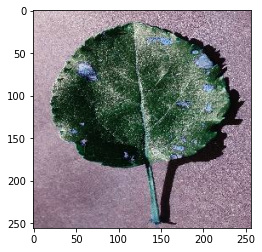

Correct prediction. For the image  AppleReduced/image (619).JPG it is predicted that leaf is  sick  and leaf is supposed to be  sick .
---------------------------------------------------------------------------------------------------------------------------------------


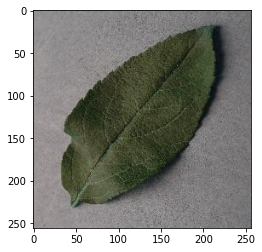

Correct prediction. For the image  AppleReduced/healthy (2).JPG it is predicted that leaf is  healthy  and leaf is supposed to be  healthy .
---------------------------------------------------------------------------------------------------------------------------------------


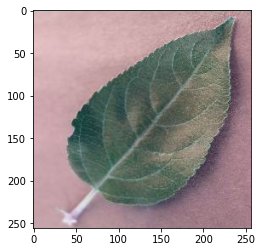

Correct prediction. For the image  AppleReduced/healthy (4).JPG it is predicted that leaf is  healthy  and leaf is supposed to be  healthy .
---------------------------------------------------------------------------------------------------------------------------------------


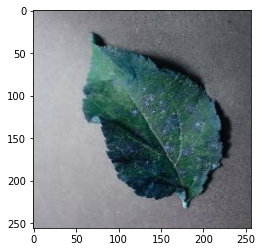

Correct prediction. For the image  AppleReduced/image (273).JPG it is predicted that leaf is  sick  and leaf is supposed to be  sick .
---------------------------------------------------------------------------------------------------------------------------------------


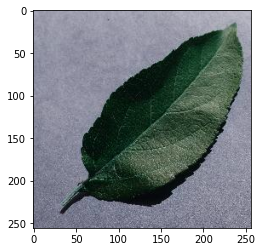

Incorrect prediction. For the image  AppleReduced/healthy (5).JPG it is predicted that leaf is  sick  and leaf is supposed to be  healthy .
---------------------------------------------------------------------------------------------------------------------------------------


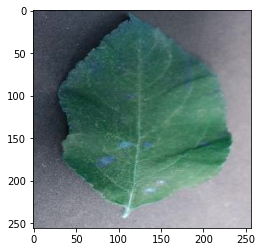

Correct prediction. For the image  AppleReduced/image (272).JPG it is predicted that leaf is  sick  and leaf is supposed to be  sick .
---------------------------------------------------------------------------------------------------------------------------------------


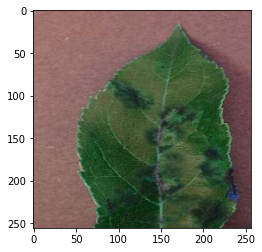

Correct prediction. For the image  AppleReduced/image (630).JPG it is predicted that leaf is  sick  and leaf is supposed to be  sick .
---------------------------------------------------------------------------------------------------------------------------------------


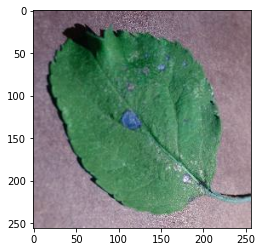

Correct prediction. For the image  AppleReduced/image (620).JPG it is predicted that leaf is  sick  and leaf is supposed to be  sick .
---------------------------------------------------------------------------------------------------------------------------------------


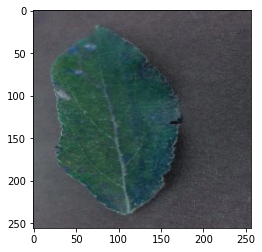

Correct prediction. For the image  AppleReduced/image (271).JPG it is predicted that leaf is  sick  and leaf is supposed to be  sick .
---------------------------------------------------------------------------------------------------------------------------------------


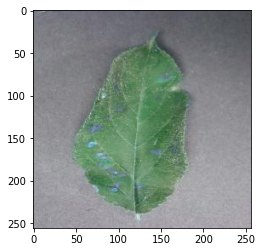

Correct prediction. For the image  AppleReduced/image (275).JPG it is predicted that leaf is  sick  and leaf is supposed to be  sick .
---------------------------------------------------------------------------------------------------------------------------------------


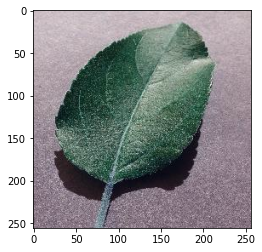

Correct prediction. For the image  AppleReduced/healthy (1).JPG it is predicted that leaf is  healthy  and leaf is supposed to be  healthy .
---------------------------------------------------------------------------------------------------------------------------------------


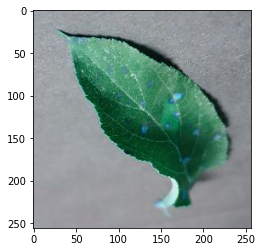

Correct prediction. For the image  AppleReduced/image (274).JPG it is predicted that leaf is  sick  and leaf is supposed to be  sick .
---------------------------------------------------------------------------------------------------------------------------------------


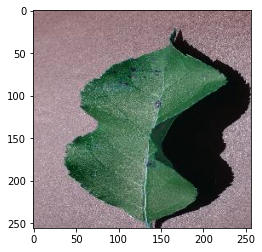

Correct prediction. For the image  AppleReduced/image (627).JPG it is predicted that leaf is  sick  and leaf is supposed to be  sick .
---------------------------------------------------------------------------------------------------------------------------------------


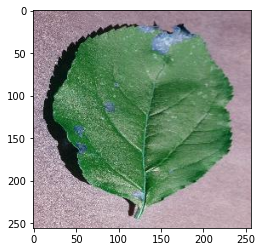

Correct prediction. For the image  AppleReduced/image (618).JPG it is predicted that leaf is  sick  and leaf is supposed to be  sick .
---------------------------------------------------------------------------------------------------------------------------------------


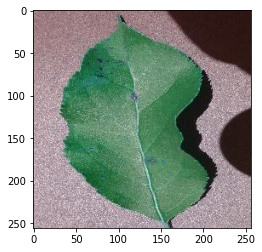

Correct prediction. For the image  AppleReduced/image (628).JPG it is predicted that leaf is  sick  and leaf is supposed to be  sick .
---------------------------------------------------------------------------------------------------------------------------------------


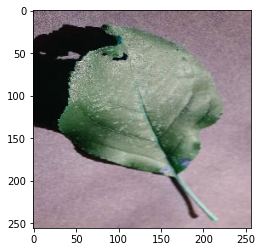

Correct prediction. For the image  AppleReduced/image (621).JPG it is predicted that leaf is  sick  and leaf is supposed to be  sick .
---------------------------------------------------------------------------------------------------------------------------------------


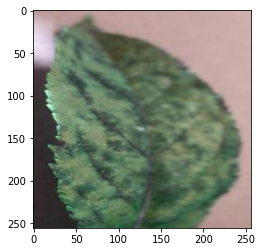

Correct prediction. For the image  AppleReduced/image (626).JPG it is predicted that leaf is  sick  and leaf is supposed to be  sick .
---------------------------------------------------------------------------------------------------------------------------------------


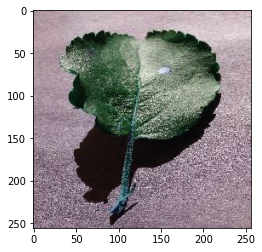

Incorrect prediction. For the image  AppleReduced/image (616).JPG it is predicted that leaf is  healthy  and leaf is supposed to be  sick .
---------------------------------------------------------------------------------------------------------------------------------------


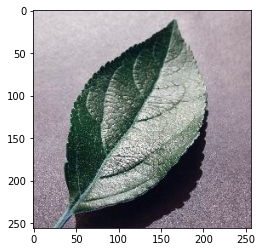

Correct prediction. For the image  AppleReduced/healthy (3).JPG it is predicted that leaf is  healthy  and leaf is supposed to be  healthy .
---------------------------------------------------------------------------------------------------------------------------------------


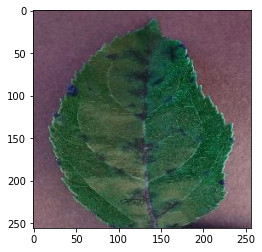

Correct prediction. For the image  AppleReduced/image (629).JPG it is predicted that leaf is  sick  and leaf is supposed to be  sick .
---------------------------------------------------------------------------------------------------------------------------------------


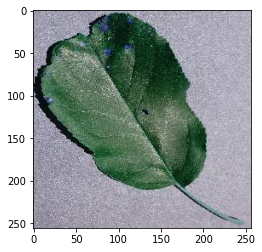

Correct prediction. For the image  AppleReduced/image (617).JPG it is predicted that leaf is  sick  and leaf is supposed to be  sick .
---------------------------------------------------------------------------------------------------------------------------------------


In [24]:
def get_leaf_features(photo):
  fixed_size = tuple((256, 256))
  names = ['mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
              'contrast','correlation','inverse_difference_moments','entropy']
  df = pd.DataFrame([], columns=names)

  img = cv2.imread(photo)
  img = cv2.resize(img, fixed_size)

  #Preprocessing
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  blur = cv2.GaussianBlur(gs, (25,25),0)
  ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
  kernel = np.ones((50,50),np.uint8)
  closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

  
  final_img = img

  #get features
  #Color features
  red_channel = final_img[:,:,0]
  green_channel = final_img[:,:,1]
  blue_channel = final_img[:,:,2]
  blue_channel[blue_channel == 255] = 0
  green_channel[green_channel == 255] = 0
  red_channel[red_channel == 255] = 0
  
  red_mean = np.mean(red_channel)
  green_mean = np.mean(green_channel)
  blue_mean = np.mean(blue_channel)
  
  red_std = np.std(red_channel)
  green_std = np.std(green_channel)
  blue_std = np.std(blue_channel)
  
  #Texture features
  textures = mahotas.features.haralick(gs)
  ht_mean = textures.mean(axis=0)
  contrast = ht_mean[1]
  correlation = ht_mean[2]
  inverse_diff_moments = ht_mean[4]
  entropy = ht_mean[8]
  #write in csv

  vector = [red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
            contrast,correlation,inverse_diff_moments,entropy ]
  df_temp = pd.DataFrame([vector],columns=names)
  df = df.append(df_temp)
  return df

path = "AppleReduced"
files = os.listdir(path)

for file in files:
    photo = os.path.join(path,file)
    #print(photo)
    leaf_features = get_leaf_features(photo)
    X= sc_X.transform(leaf_features)
    if "healthy" not in photo: 
      y = [1]
    else:
      y = [0];

    y_pred = grid.predict(X)
   
    img = cv2.imread(photo)
    plt.imshow(img)
    plt.show()
    
    real = "healthy" if y == [0] else "sick"
    predicted = "healthy" if y_pred == [0] else "sick"
    isCorrect = "Correct prediction." if metrics.accuracy_score(y, y_pred) == 1.0 else "Incorrect prediction."
    print(isCorrect,"For the image " ,photo, "it is predicted that leaf is ",predicted," and leaf is supposed to be ",real,".")
    print("---------------------------------------------------------------------------------------------------------------------------------------")
